<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/Tugas_1_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas #1 Artificial Intelligence**

## **Perbandingan Algoritma k-Nearest Neighbor (k-NN) dan Gaussian Naive Bayes Classifier**

**Nama : Habib Royni Mujtahid**

NIM : 23.55.1360

Kelas : AI-1 PJ031

# **Dataset**

### **Pima Indians Diabetes Database**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### **Acknowledgements**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**Auth kaggle**

In [2]:
# install kaggle package
!pip install kaggle

# upload json kaggle auth token with file name kaggle.json (download from https://www.kaggle.com/settings)
from google.colab import files
files.upload()

# save kaggle file auth
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**Download dataset & unzip**

In [3]:
# download dataset Pima Indians Diabetes Database
!kaggle datasets download -d uciml/pima-indians-diabetes-database

# unzip dataset
!unzip pima-indians-diabetes-database.zip

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 18.9MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


**Load dataset to pandas dataframe variable**

In [4]:
import pandas as pd

# load dataset
dataset = pd.read_csv('diabetes.csv')

# show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# show dataset first & last rows
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataset, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataset, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataset, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dataset, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataset, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataset, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataset, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dataset, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dataset, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness'], ['SkinThickness', 'Insulin']]], **{})
chart

Text(0.5, 1.0, 'Distribution of Class')

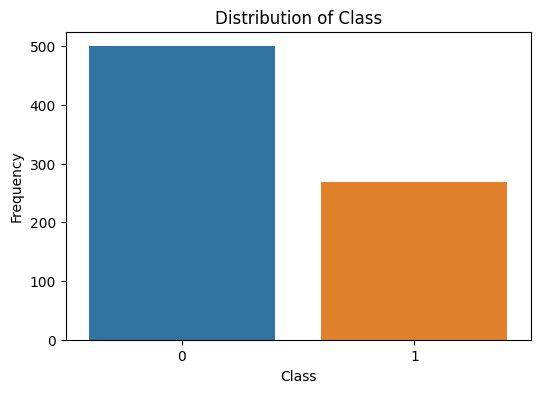

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# class distribution
df = pd.DataFrame(dataset)
classCounts = dataset['Outcome'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=classCounts.index, y=classCounts.values)

# add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class')

# **Preprocessing**

**Split data for feature & class**

In [7]:
# split into independent (x) and dependent (y) variable
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,8].values

**Feature Scaling with MinMaxScaler**

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

x = scaler.transform(x)

**Split data feature for train & test**

In [9]:
from sklearn.model_selection import train_test_split

#split data into x train, y train, x test and y test with 20% of data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=16)

# **Model Development & Prediction**
Model :


1.   k-Nearest Neighbor (k-NN)
2.   Gaussian Naive Bayes

# **1. Train data with k-Nearest Neighbor (k-NN)**

k Min Error :  19


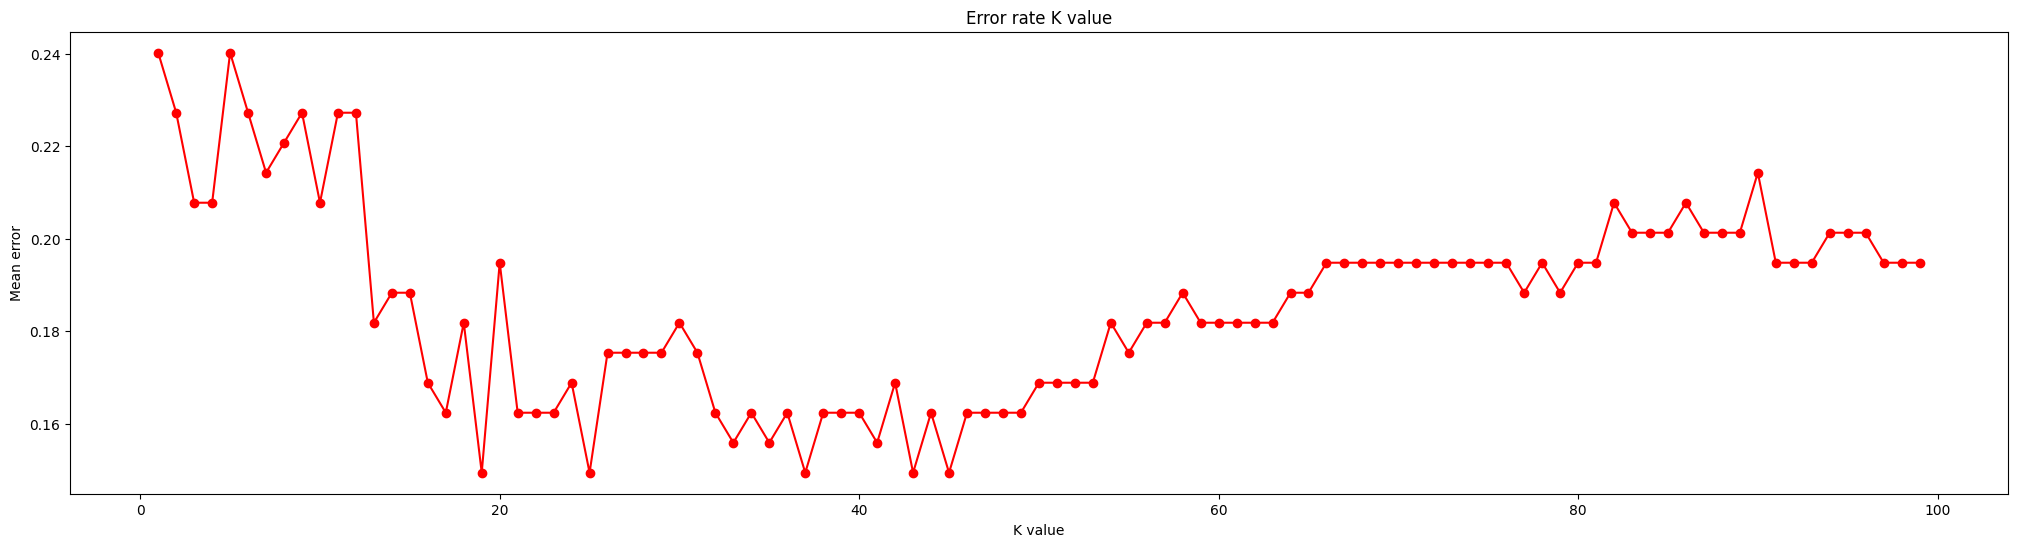

In [10]:
# train data with k-NN and k >= 1 to 100
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# error data test
error = []

# loop train
for i in range(1, 100):
  classifierKNN = KNeighborsClassifier(n_neighbors=i)
  classifierKNN.fit(x_train, y_train)
  pred_i = classifierKNN.predict(x_test)
  error.append(np.mean(pred_i != y_test))

# viz error rate k value
plt.figure(figsize=(25,6))
plt.plot(range(1,100), error, color='red', marker='o')
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean error')

# get min error
kMinError = error.index(min(error))+1
print('k Min Error : ', kMinError)

**The lowest error rate is 19 so k = 19**

In [11]:
# classifier with best k
classifierKNN = KNeighborsClassifier(n_neighbors=kMinError)
classifierKNN.fit(x_train, y_train)

# prediction data
y_pred = classifierKNN.predict(x_test)

# show actual and predict data
print(y_test)
print(y_pred)

[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1]
[1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0]


**Evaluate k-NN with k=19**

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       102
           1       0.87      0.65      0.75        52

    accuracy                           0.85       154
   macro avg       0.86      0.80      0.82       154
weighted avg       0.85      0.85      0.84       154

accuracy : 85%


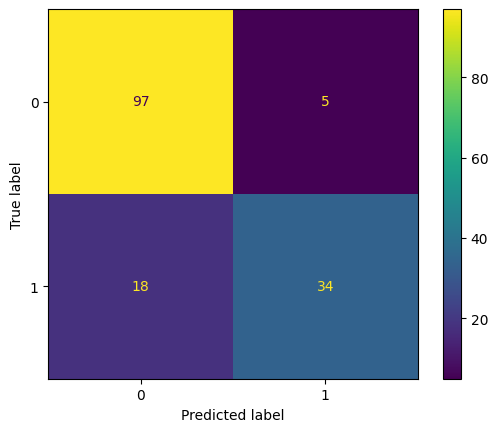

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# show result for evaluation algorithm with confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
classificationReport = classification_report(y_test, y_pred)
accuracyScoreKnn = accuracy_score(y_test, y_pred)

# show classification report
print(classificationReport)

# show accuracy score (percentage)
print(f'accuracy : {accuracyScoreKnn:.0%}')

# show confusion matrix table
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classifierKNN.classes_)
cmDisplay.plot()
plt.show()

# **2. Train data with Gaussian Naive Bayes**

In [13]:
from sklearn.naive_bayes import GaussianNB

# classifier with Gaussian Naive Bayes
classifierGNB = GaussianNB()
classifierGNB.fit(x_train, y_train)

# prediction data
y_pred = classifierGNB.predict(x_test)

# show actual and predict data
print(y_test)
print(y_pred)

[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1]
[0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       102
           1       0.78      0.67      0.72        52

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154

accuracy : 82%


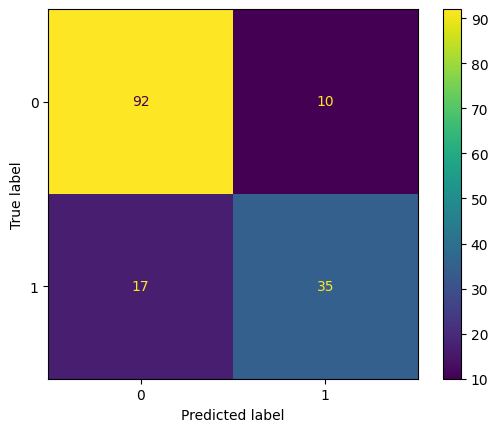

In [14]:
# show result for evaluation algorithm with confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
classificationReport = classification_report(y_test, y_pred)
accuracyScoreGnb = accuracy_score(y_test, y_pred)

# show classification report
print(classificationReport)

# show accuracy score (percentage)
print(f'accuracy : {accuracyScoreGnb:.0%}')

# show confusion matrix table
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classifierKNN.classes_)
cmDisplay.plot()
plt.show()

# **Conclusion**
With the best method to divide the dataset for training or testing and using the minimum error rate for k in k-NN, the k-Nearest Neighbor (k-NN) algorithm gets an accuracy value of **85%** while Gaussian Naive Bayes gets an accuracy value of **82%**

So we conclude that **k-Nearest Neighbor (k-NN)** with **k=19** is the best algorithm for training the Pima Indians Diabetes Database dataset with an accuracy value of **85%**